In [3]:
# Import the necessary libraries
import pandas as pd # data processing, csv file(e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import os
import matplotlib.pyplot as plt

# Paths to datasets
differentDataset_paths = [
    r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\country_wise_latest.csv",
    r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\covid_19_clean_complete.csv",
    r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\day_wise.csv",
    r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\full_grouped.csv",
    r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\usa_county_wise.csv",
    r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\worldometer_data.csv"
]

# Iterate through each dataset path
for differentDataset_path in differentDataset_paths:
    for dirname, _, filenames in os.walk(differentDataset_path):
        for filename in filenames:
            print(os.path.join(dirname, filename))
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls




Preprocessing all datasets


In [4]:
# Load and display the first few rows of each dataset
for datas in differentDataset_paths:
    dataset = pd.read_csv(datas)
    print(dataset)
    print() #Empty line for separation

         Country/Region  Confirmed  Deaths  Recovered  Active  New cases   
0           Afghanistan      36263    1269      25198    9796        106  \
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases   
0         

Visulization of data to see number of Confirmed covid infections by country


<Axes: >

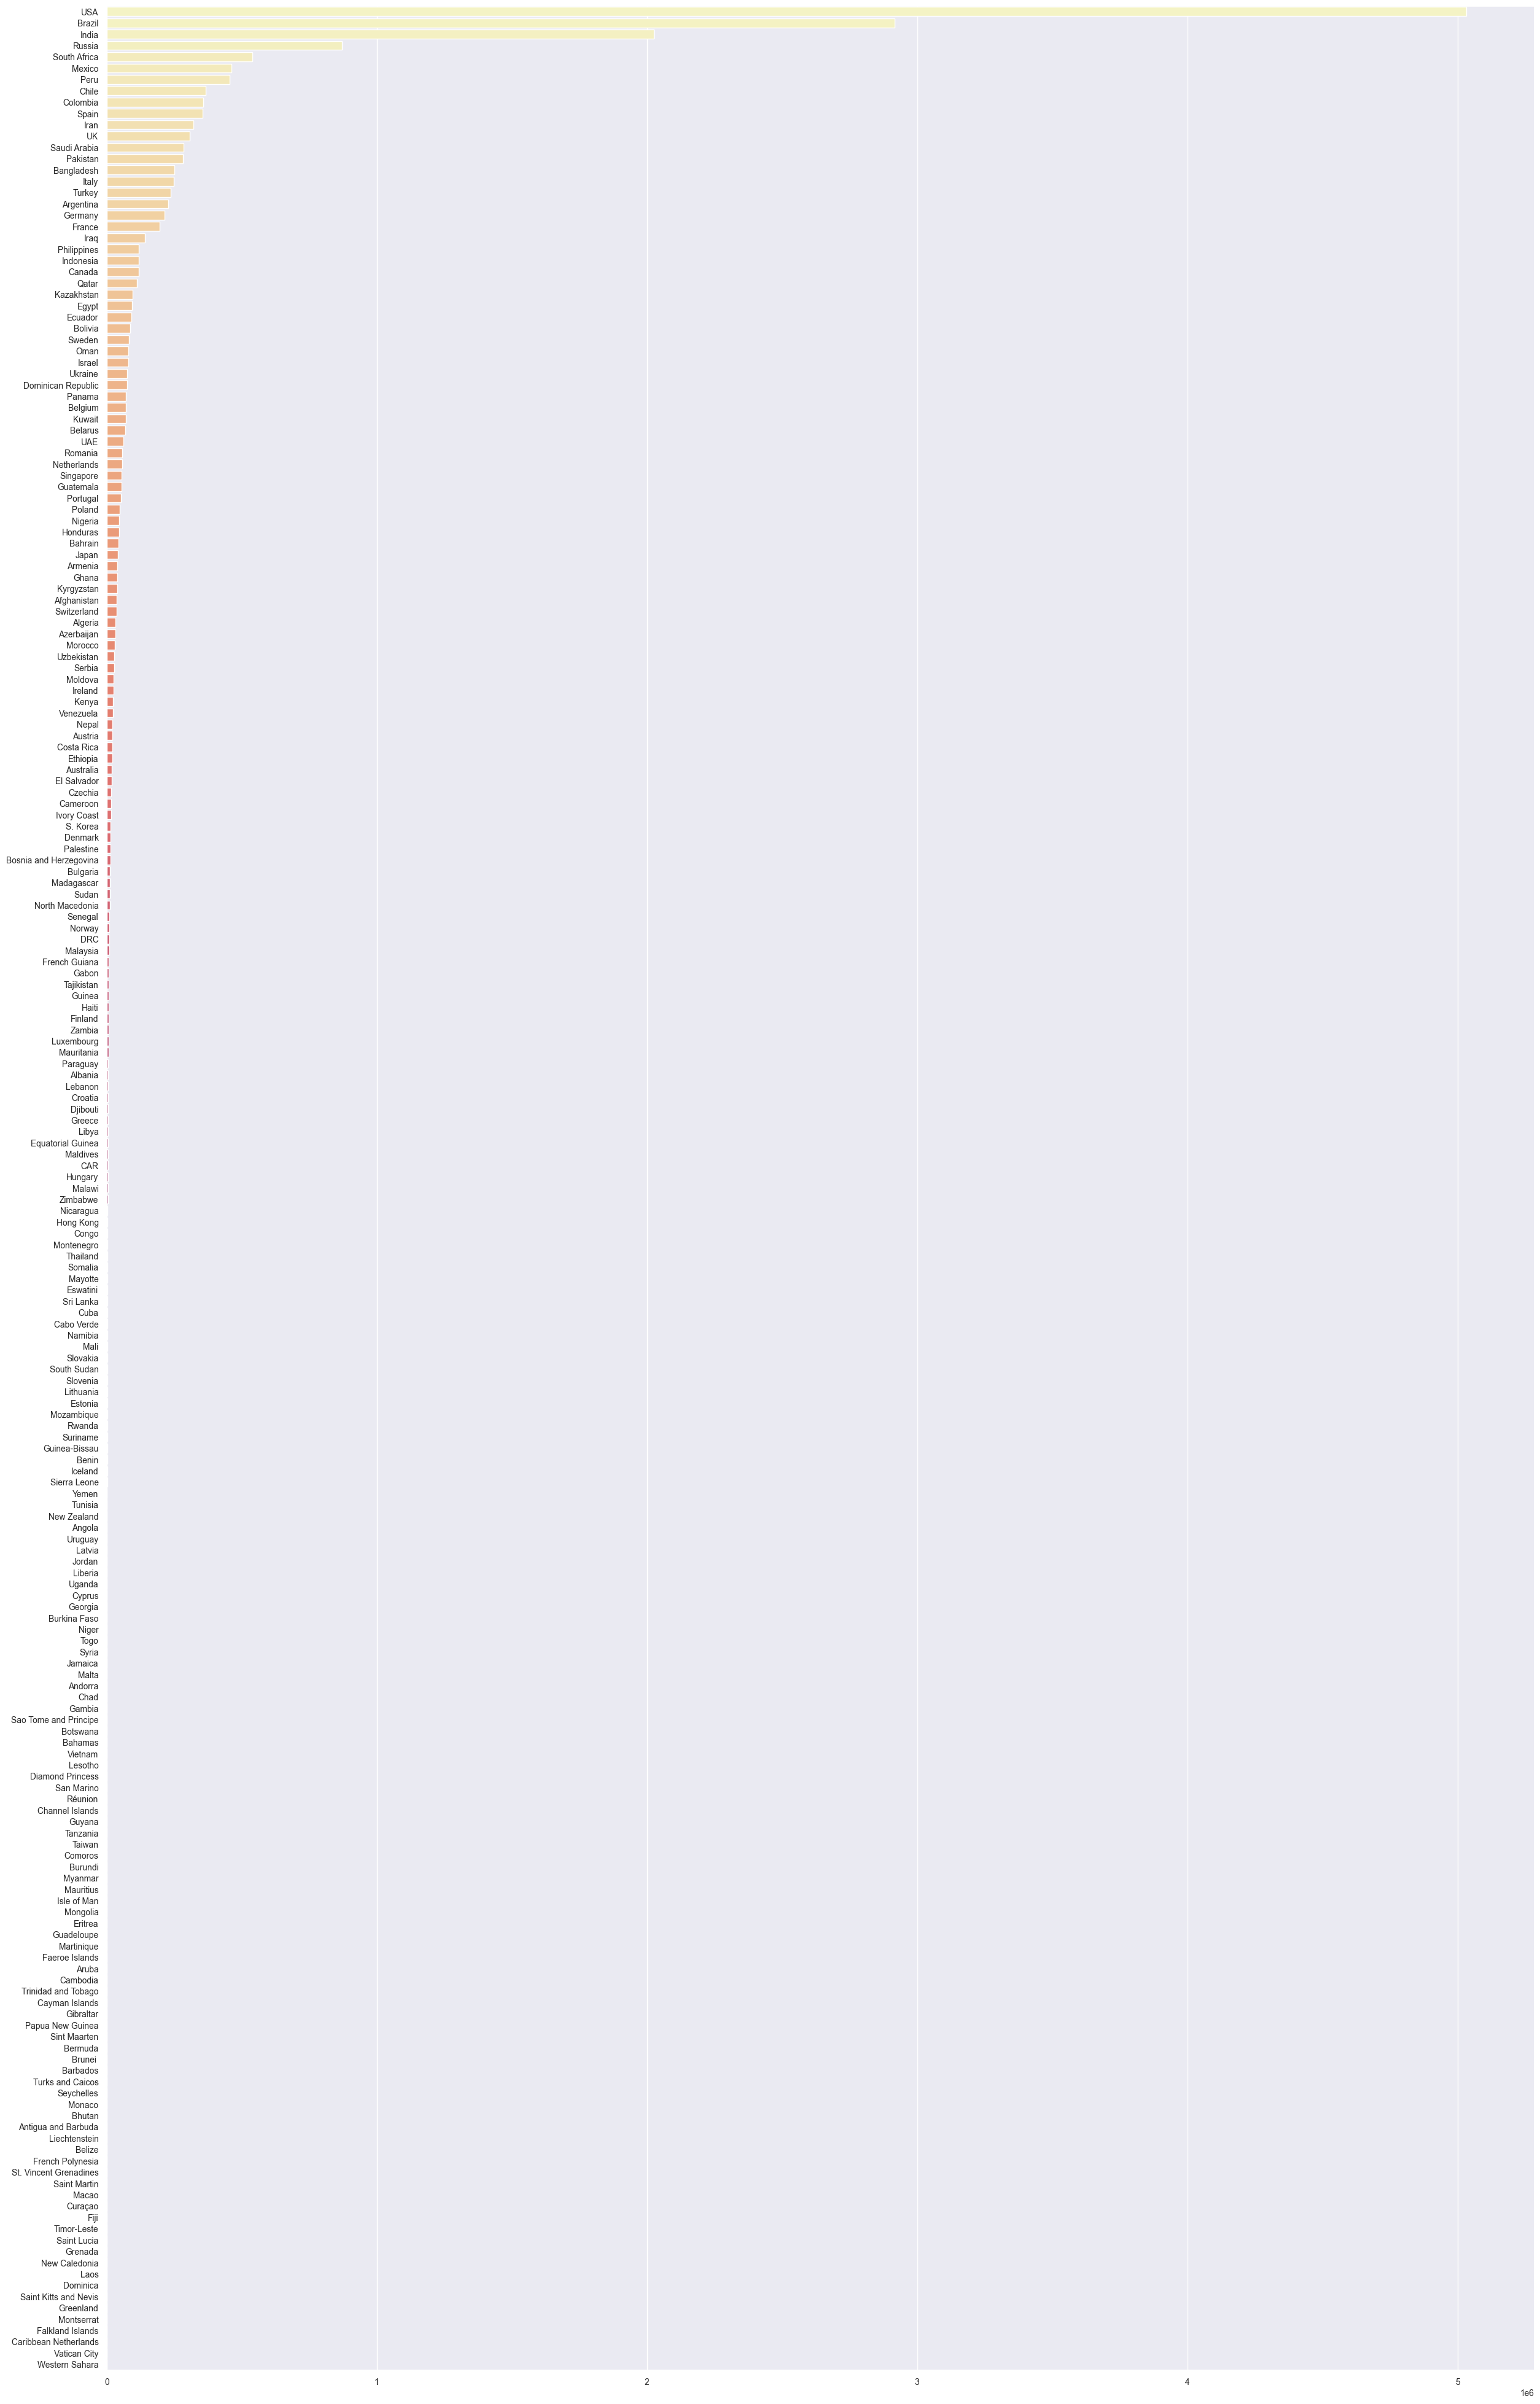

In [5]:
# extract 'end' and 'countries' from dataset
end = dataset['TotalCases']
countries = dataset['Country/Region']

# sort the lists in reverse order based on the 'end' values
end, countries = (list(x) for x in zip(*sorted(zip(end, countries), reverse=True)))

# Create the bar plot
sns.set(font_scale=0.9)
#plt.figure(figsize=(30, 50))
f, ax = plt.subplots(figsize=(30,50))
colors_cw = sns.color_palette('magma', len(countries))
sns.barplot(x=end, y=countries, palette=colors_cw[::-1])


#plt.show()  # Display the plot



In [7]:
dayWiseDataFrame = pd.read_csv(r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\day_wise.csv")

dayWiseDataFrame

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


Predictions/forecasting of covid cases

18:54:38 - cmdstanpy - INFO - Chain [1] start processing
18:54:38 - cmdstanpy - INFO - Chain [1] done processing


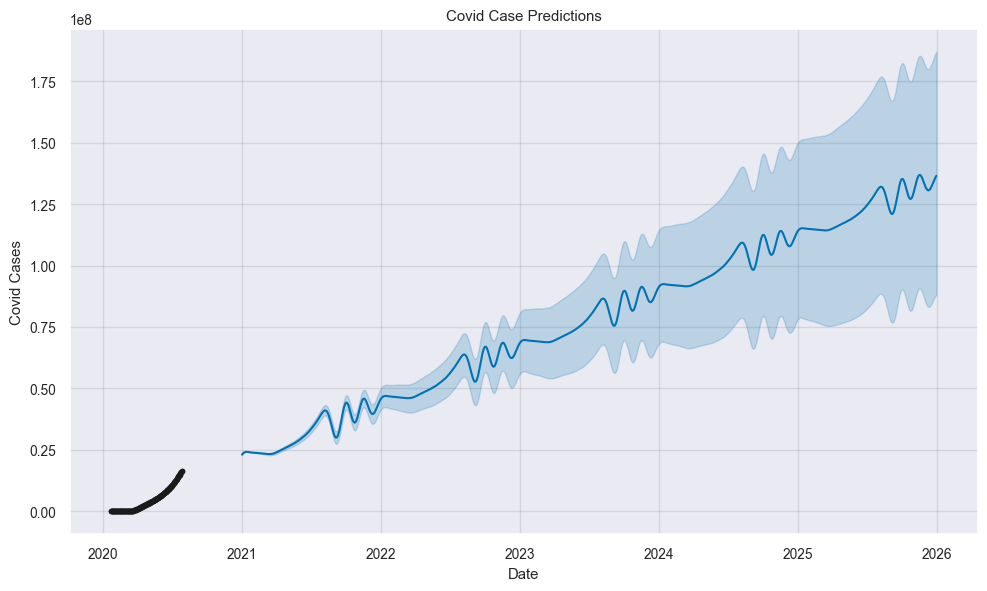

             ds          yhat    yhat_lower    yhat_upper
1821 2025-12-27  1.353765e+08  8.726051e+07  1.857805e+08
1822 2025-12-28  1.356993e+08  8.752855e+07  1.861505e+08
1823 2025-12-29  1.359996e+08  8.778550e+07  1.865099e+08
1824 2025-12-30  1.362885e+08  8.802353e+07  1.868469e+08
1825 2025-12-31  1.365597e+08  8.824044e+07  1.871751e+08


In [13]:

dayWiseDataFrame = pd.read_csv(r"C:\Users\ade18\OneDrive\Documents\university_Projs\Covid_Ml_project\day_wise.csv")

# Prepare the data for Prophet
dayWiseDataFrame2 = pd.DataFrame()
dayWiseDataFrame2['Date'] = dayWiseDataFrame['Date']
dayWiseDataFrame2['Confirmed'] = dayWiseDataFrame['Confirmed']
prediction = dayWiseDataFrame2.rename(columns={'Date':'ds', 'Confirmed':'y'})

# Initialize and train the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(prediction)

# Generate future dates for prediction (up to 2025)
future = pd.DataFrame({'ds': pd.date_range(start='2021-01-01', end='2025-12-31', freq='D')})

# Make predictions for the future dates
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Covid Case Predictions')
plt.xlabel('Date')
plt.ylabel('Covid Cases')
plt.show()

# Display the last few predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())